In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("TAB_Betting_Data.csv")

df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])

# Define the recency reference date
recency_date = datetime(2022, 12, 31)

# Group by 'BET_ACCOUNT_NUM_HASH' and calculate RFM metrics in one go
rfm_analysis_df = df.groupby('BET_ACCOUNT_NUM_HASH').agg(
    recency=('DATE_DIM', lambda x: (recency_date - x.max()).days),
    frequency=('DATE_DIM', 'nunique'),
    monetary=('TOTAL_TURNOVER', 'sum')
).reset_index()

print("RFM data exported successfully to RFM_analysis.xlsx!")


RFM data exported successfully to RFM_analysis.xlsx!


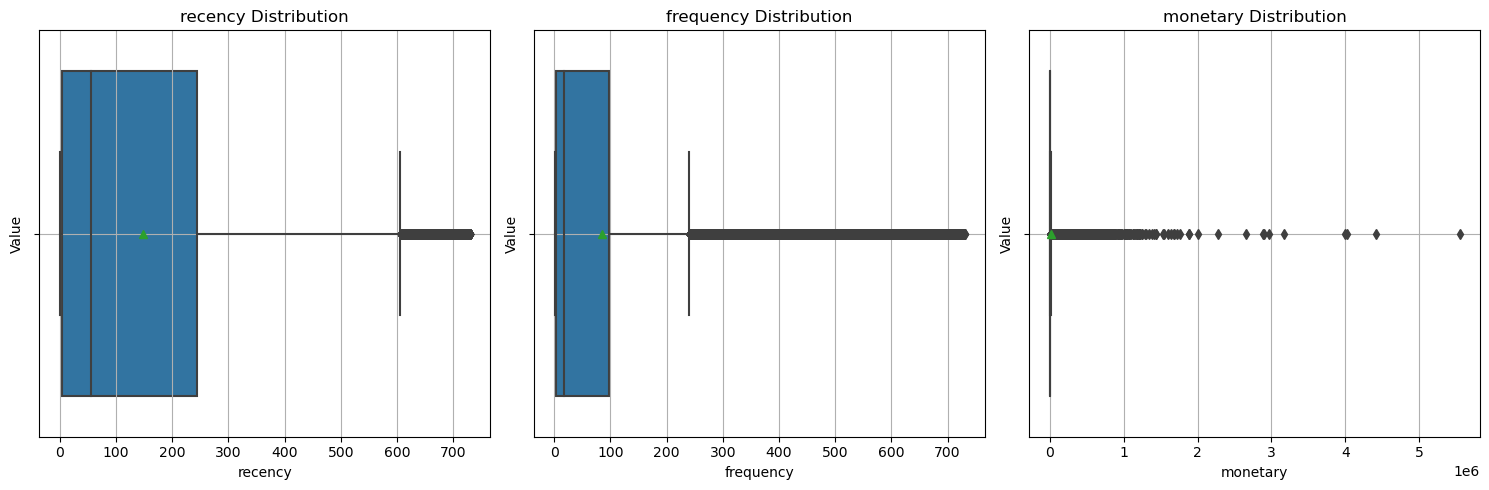

In [3]:
# 4. DISTRIBUTION OF RFM METRICS
import matplotlib.pyplot as plt
import seaborn as sns
# Select RFM features
rfm_features = rfm_analysis_df[["recency", "frequency", "monetary"]]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(rfm_features):
    sns.boxplot(x=feature, showmeans=True, data=rfm_analysis_df, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Value")
    axes[i].grid(True)

fig.tight_layout()

In [7]:
print(df)

           DATE_DIM DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0        2021-01-01         Fri                 13154  67.0      65+      M   
1        2021-01-01         Fri                 18379  54.0    45-54      M   
2        2021-01-01         Fri                559232  63.0    55-64      M   
3        2021-01-01         Fri                698904  69.0      65+      M   
4        2021-01-01         Fri                762921  67.0      65+      M   
...             ...         ...                   ...   ...      ...    ...   
12364096 2022-12-31         Sat            4293715592  61.0    55-64      F   
12364097 2022-12-31         Sat            4294296954  30.0    25-34      U   
12364098 2022-12-31         Sat            4294378139  46.0    45-54      U   
12364099 2022-12-31         Sat            4294561160  33.0    25-34      F   
12364100 2022-12-31         Sat            4294891076  67.0      65+      F   

          TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RAC

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


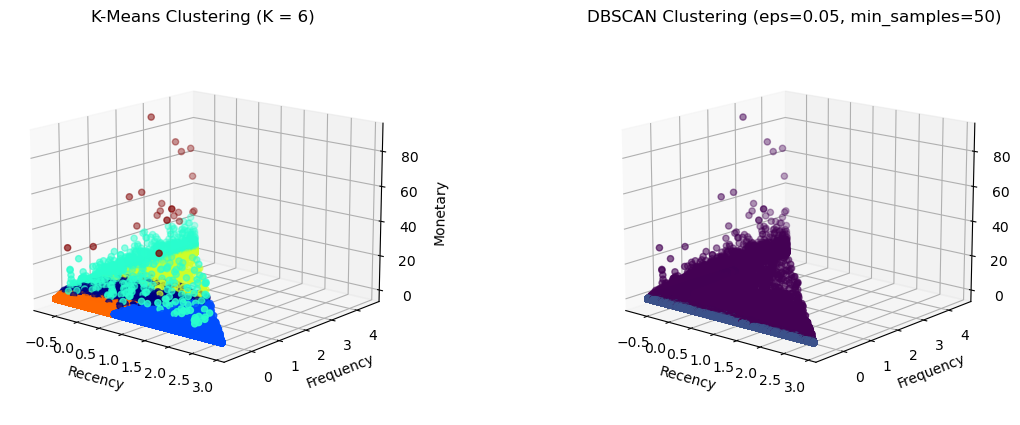

In [10]:
#3 k-MEANS & DBSCAN CLUSTERING
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Import Excel data
df = pd.read_excel("RFM_analysis.xlsx", sheet_name="Sheet1")

# Extract RFM columns
data = df[["recency", "frequency", "monetary"]]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-Means clustering with specified number of clusters
desired_k = 6  
kmeans = KMeans(n_clusters=desired_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# DBSCAN clustering with tighter parameters
eps = 0.05  
min_samples = 50  
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)

# 3D visualizations with labels
fig = plt.figure(figsize=(14, 5))

# K-Means
ax = fig.add_subplot(121, projection="3d")
ax.view_init(elev=15, azim=-50)
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=kmeans_labels, cmap="jet")
ax.set_xlabel("Recency") 
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("K-Means Clustering (K = {})".format(desired_k))

# DBSCAN
ax = fig.add_subplot(122, projection="3d")
ax.view_init(elev=15, azim=-50)
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=dbscan_labels, cmap="viridis")
ax.set_xlabel("Recency") 
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("DBSCAN Clustering (eps={}, min_samples={})".format(eps, min_samples))

plt.show()

# Export results to CSV
df["KMeans_Cluster"] = kmeans_labels + 1 
df.set_index("BET_ACCOUNT_NUM_HASH", inplace=True)
df.to_excel("RFM_Clustering.xlsx")  

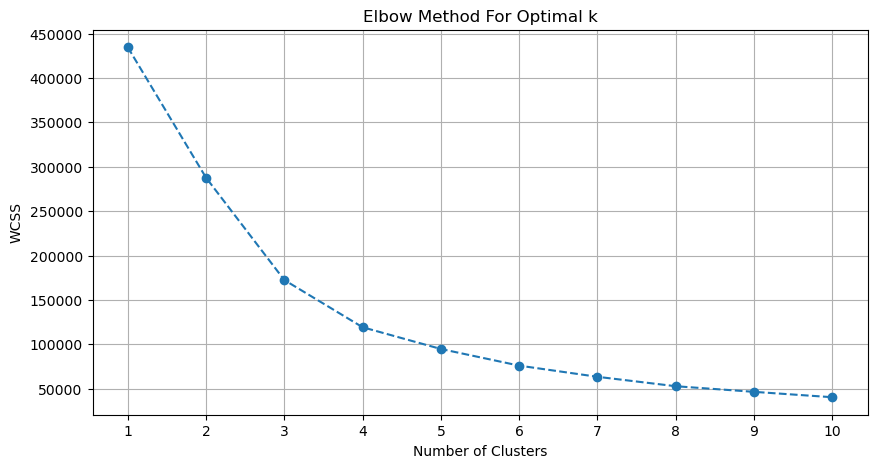

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Calculate WCSS for a range of number of clusters
wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.xticks(range(1, 11))  
plt.grid(True)
plt.show()
